In [1]:
# Importing necessary libraries to conduct our analysis
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML,display

warnings.filterwarnings("ignore")

for dirname, _, filenames in os.walk('E:\TE_Project\datacsv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

E:\TE_Project\datacsv\India.csv
E:\TE_Project\datacsv\India1.csv
E:\TE_Project\datacsv\India2.csv
E:\TE_Project\datacsv\India3.csv
E:\TE_Project\datacsv\India3.xlsx


In [2]:
#Reading the dataset into object 'df' using pandas:
df= pd.read_csv('E:/TE_Project/datacsv/India.csv',index_col='date_time',parse_dates=True)


In [3]:
df.head(5)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
date_time,,,,,,,,,,,,,,,,,,,,,
2015-01-01,24,11,0.0,8.7,5,72,02:39 PM,03:24 AM,07:14 AM,05:36 PM,...,10,14,37,0.0,1017,24,10,63,6,India
2015-01-02,18,11,0.0,5.5,3,80,03:27 PM,04:21 AM,07:14 AM,05:36 PM,...,15,60,62,1.7,1019,18,8,96,10,India
2015-01-03,19,13,0.0,8.7,5,87,04:16 PM,05:16 AM,07:15 AM,05:37 PM,...,8,38,82,0.0,1018,19,10,113,5,India
2015-01-04,23,13,0.0,8.7,5,94,05:08 PM,06:08 AM,07:15 AM,05:38 PM,...,18,1,60,0.0,1019,23,10,322,12,India
2015-01-05,21,10,0.0,8.7,5,100,06:01 PM,06:57 AM,07:15 AM,05:38 PM,...,23,0,48,0.0,1016,21,10,296,16,India


In [4]:
df.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,2009.000000,2009.000000,2009.0,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000
mean,34.509706,25.330015,0.0,11.280040,7.508213,46.121951,11.033848,30.985565,31.042310,29.828771,11.999502,14.359383,36.253858,1.639771,1007.226481,34.509706,9.894475,214.362369,9.341961
std,7.246446,7.604786,0.0,2.145863,1.605536,31.299583,7.793452,8.721984,8.632417,7.624632,4.699697,16.620658,16.470584,8.122132,7.668426,7.246446,0.422021,77.523111,3.536947
min,15.000000,8.000000,0.0,3.800000,3.000000,0.000000,-7.000000,12.000000,12.000000,12.000000,3.000000,0.000000,5.000000,0.000000,989.000000,15.000000,5.000000,42.000000,2.000000
25%,29.000000,19.000000,0.0,8.700000,6.000000,18.000000,5.000000,24.000000,24.000000,24.000000,9.000000,1.000000,23.000000,0.000000,1000.000000,29.000000,10.000000,142.000000,7.000000
50%,36.000000,27.000000,0.0,11.600000,8.000000,46.000000,10.000000,32.000000,32.000000,32.000000,11.000000,7.000000,34.000000,0.000000,1007.000000,36.000000,10.000000,227.000000,9.000000
75%,40.000000,31.000000,0.0,13.300000,9.000000,73.000000,18.000000,38.000000,38.000000,36.000000,15.000000,24.000000,49.000000,0.200000,1014.000000,40.000000,10.000000,287.000000,11.000000
max,51.000000,42.000000,0.0,14.000000,11.000000,100.000000,26.000000,50.000000,50.000000,46.000000,46.000000,91.000000,88.000000,211.000000,1023.000000,51.000000,10.000000,338.000000,30.000000


In [5]:
df=df[['tempC']]

In [6]:
df

,tempC
date_time,
2015-01-01,24
2015-01-02,18
2015-01-03,19
2015-01-04,23
2015-01-05,21
...,...
2020-06-27,43
2020-06-28,45
2020-06-29,43


In [7]:

df=df.resample(rule='MS').mean()

In [8]:
df.tail(7)

,tempC
date_time,
2020-01-01,21.000000
2020-02-01,26.827586
2020-03-01,30.290323
2020-04-01,38.066667
2020-05-01,43.451613
2020-06-01,43.966667
2020-07-01,47.000000


In [9]:
df['tempC']==df.mean(axis=1)

date_time
2015-01-01    True
2015-02-01    True
2015-03-01    True
2015-04-01    True
2015-05-01    True
              ... 
2020-03-01    True
2020-04-01    True
2020-05-01    True
2020-06-01    True
2020-07-01    True
Freq: MS, Length: 67, dtype: bool

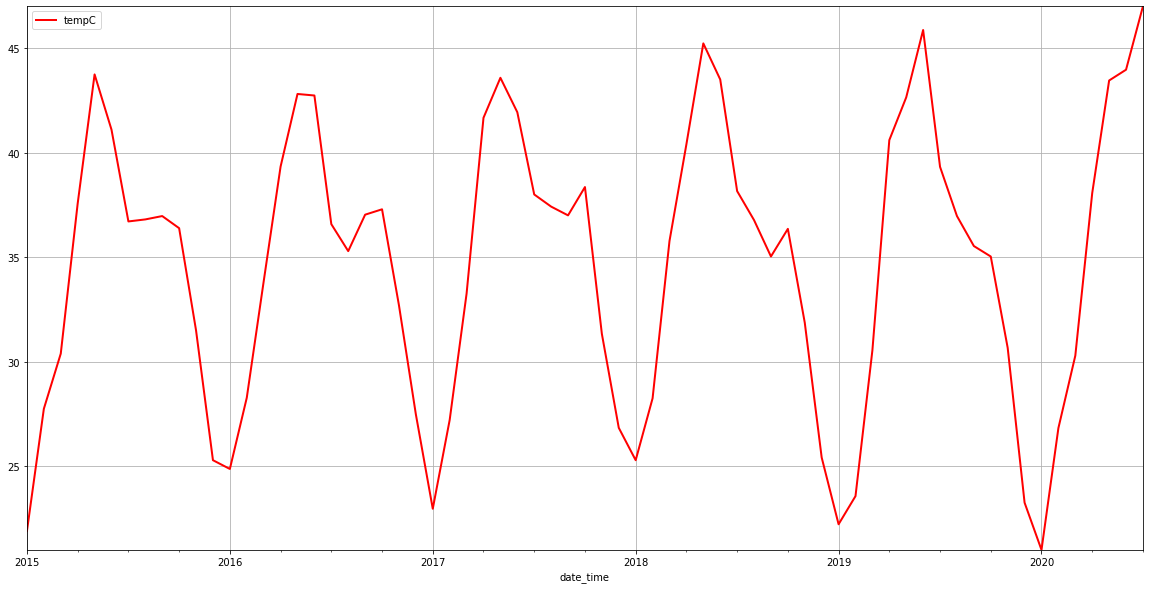

In [10]:
ax=df[['tempC']].plot(figsize=(20,10),grid=True,lw=2,color='Red')
ax.autoscale(enable=True, axis='both', tight=True)

In [11]:
df_2019=df['2019-01-01':'2020-01-01']
df_2019.head()

,tempC
date_time,
2019-01-01,22.225806
2019-02-01,23.571429
2019-03-01,30.548387
2019-04-01,40.600000
2019-05-01,42.645161


In [12]:
df_2019.isna().sum()

tempC    0
dtype: int64

In [13]:
temp_2019=df_2019.mean(axis=0)

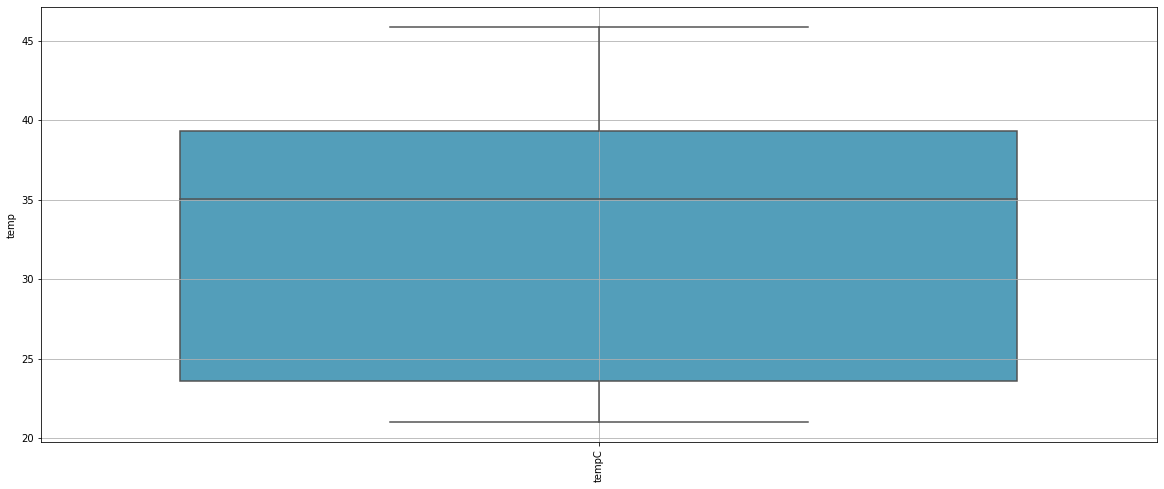

In [14]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
bplot = sns.boxplot( data=df_2019,  width=0.75,palette="GnBu_d")
plt.ylabel('temp');
bplot.grid(True)

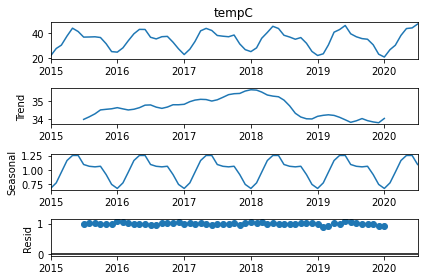

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
India_temp=df['tempC']
result=seasonal_decompose(India_temp,model='multiplicative')
result.plot();

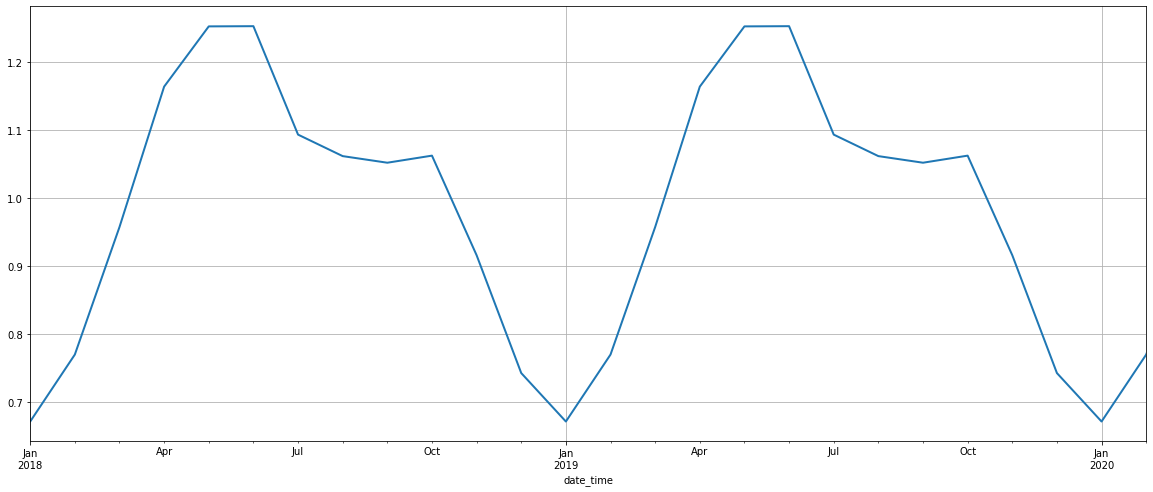

In [16]:
from matplotlib import dates
ax=result.seasonal.plot(xlim=['2018-01-01','2020-02-10'],figsize=(20,8),lw=2)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [17]:
#Formatting necessary to Prophet:
India_temp=India_temp.reset_index()
India_temp.columns=['ds','y']
India_temp=India_temp.set_index('ds')

In [18]:
train=India_temp[:-24]
test=India_temp[-24:-12]

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [20]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [21]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 24
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [22]:
#To give an idea of what generator file holds:
X,y = generator[0]

In [23]:
# We can see that the x array gives the list of values that we are going to predict y of:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.25069156 0.3637621  0.67159982 0.93637621 0.8230982
 0.63485477 0.63900415 0.64587367 0.62102351 0.41147994 0.14522822
 0.12724758 0.2732389  0.51175657 0.74734901 0.89626556 0.89313047
 0.62932227 0.57399723 0.64873213 0.65975104 0.46293223 0.23928077]
Predict this y: 
 [[0.04564315]]


In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [25]:
# defining the model(note that  I am using a very basic model here, a 2 layer model only):
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Fitting the model with the generator object:
model.fit_generator(generator,epochs=250)

Epoch 1/250
19/19 [==============================] - 1s 5ms/step - loss: 0.3854
Epoch 2/250
19/19 [==============================] - 0s 6ms/step - loss: 0.0805
Epoch 3/250
19/19 [==============================] - 0s 5ms/step - loss: 0.1027
Epoch 4/250
19/19 [==============================] - 0s 5ms/step - loss: 0.1220
Epoch 5/250
19/19 [==============================] - 0s 5ms/step - loss: 0.0688
Epoch 6/250
19/19 [==============================] - 0s 5ms/step - loss: 0.0945
Epoch 7/250
19/19 [==============================] - 0s 5ms/step - loss: 0.0930
Epoch 8/250
19/19 [==============================] - 0s 6ms/step - loss: 0.0871
Epoch 9/250
19/19 [==============================] - 0s 5ms/step - loss: 0.0897
Epoch 10/250
19/19 [==============================] - 0s 6ms/step - loss: 0.0810
Epoch 11/250
19/19 [==============================] - 0s 7ms/step - loss: 0.1016
Epoch 12/250
19/19 [==============================] - 0s 6ms/step - loss: 0.0967
Epoch 13/250
19/19 [=================

19/19 [==============================] - 0s 8ms/step - loss: 0.0073
Epoch 103/250
19/19 [==============================] - 0s 7ms/step - loss: 0.0048
Epoch 104/250
19/19 [==============================] - 0s 7ms/step - loss: 0.0046
Epoch 105/250
19/19 [==============================] - 0s 9ms/step - loss: 0.0040
Epoch 106/250
19/19 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 107/250
19/19 [==============================] - 0s 7ms/step - loss: 0.0018
Epoch 108/250
19/19 [==============================] - 0s 8ms/step - loss: 0.0055
Epoch 109/250
19/19 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 110/250
19/19 [==============================] - 0s 6ms/step - loss: 0.0041
Epoch 111/250
19/19 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 112/250
19/19 [==============================] - 0s 7ms/step - loss: 0.0041
Epoch 113/250
19/19 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 114/250
19/19 [=========

19/19 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 203/250
19/19 [==============================] - 0s 6ms/step - loss: 0.0025
Epoch 204/250
19/19 [==============================] - 0s 6ms/step - loss: 0.0048
Epoch 205/250
19/19 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 206/250
19/19 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 207/250
19/19 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 208/250
19/19 [==============================] - 0s 7ms/step - loss: 0.0071
Epoch 209/250
19/19 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 210/250
19/19 [==============================] - 0s 11ms/step - loss: 0.0020
Epoch 211/250
19/19 [==============================] - 0s 10ms/step - loss: 0.0011
Epoch 212/250
19/19 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 213/250
19/19 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 214/250
19/19 [=======

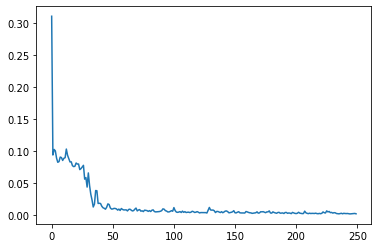

In [27]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [28]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    
    current_pred = model.predict(current_batch)[0]
    
    
    test_predictions.append(current_pred) 
    
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [29]:
true_predictions = scaler.inverse_transform(test_predictions)

In [30]:
test['Predictions'] = true_predictions

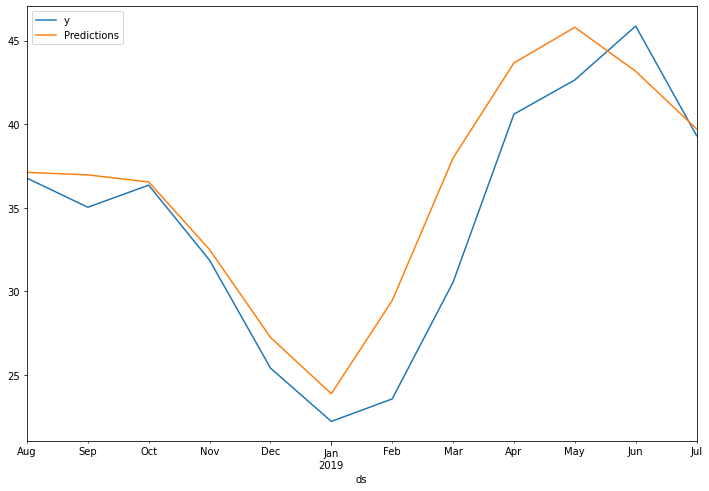

In [31]:
test.plot(figsize=(12,8))
plt.plot(true_predictions)

In [32]:
import numpy as np
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(test['y'],test['Predictions']))
print('RMSE = ',RMSE)
print('India_temp=',India_temp['y'].mean())

RMSE =  3.2520919094094265
India_temp= 34.66871964664205


In [33]:
scaler.fit(India_temp)
scaled_India_temp=scaler.transform(India_temp)

In [34]:
generator = TimeseriesGenerator(scaled_India_temp, scaled_India_temp, length=n_input, batch_size=1)

In [35]:
model.fit_generator(generator,epochs=250)


Epoch 1/250
43/43 [==============================] - 0s 7ms/step - loss: 0.0145
Epoch 2/250
43/43 [==============================] - 0s 6ms/step - loss: 0.0104
Epoch 3/250
43/43 [==============================] - 0s 6ms/step - loss: 0.0116
Epoch 4/250
43/43 [==============================] - 0s 6ms/step - loss: 0.0108
Epoch 5/250
43/43 [==============================] - 0s 6ms/step - loss: 0.0084
Epoch 6/250
43/43 [==============================] - 0s 7ms/step - loss: 0.0091
Epoch 7/250
43/43 [==============================] - 0s 6ms/step - loss: 0.0103
Epoch 8/250
43/43 [==============================] - 0s 6ms/step - loss: 0.0080
Epoch 9/250
43/43 [==============================] - 0s 6ms/step - loss: 0.0114
Epoch 10/250
43/43 [==============================] - 0s 6ms/step - loss: 0.0104
Epoch 11/250
43/43 [==============================] - 0s 6ms/step - loss: 0.0078
Epoch 12/250
43/43 [==============================] - 0s 6ms/step - loss: 0.0089
Epoch 13/250
43/43 [=================

43/43 [==============================] - 0s 6ms/step - loss: 0.0061
Epoch 103/250
43/43 [==============================] - 0s 5ms/step - loss: 0.0058
Epoch 104/250
43/43 [==============================] - 0s 5ms/step - loss: 0.0055
Epoch 105/250
43/43 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 106/250
43/43 [==============================] - 0s 5ms/step - loss: 0.0056
Epoch 107/250
43/43 [==============================] - 0s 5ms/step - loss: 0.0062
Epoch 108/250
43/43 [==============================] - 0s 6ms/step - loss: 0.0054
Epoch 109/250
43/43 [==============================] - 0s 6ms/step - loss: 0.0054
Epoch 110/250
43/43 [==============================] - 0s 5ms/step - loss: 0.0056
Epoch 111/250
43/43 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 112/250
43/43 [==============================] - 0s 5ms/step - loss: 0.0068
Epoch 113/250
43/43 [==============================] - 0s 6ms/step - loss: 0.0052
Epoch 114/250
43/43 [=========

43/43 [==============================] - 0s 7ms/step - loss: 0.0047
Epoch 203/250
43/43 [==============================] - 0s 7ms/step - loss: 0.0056
Epoch 204/250
43/43 [==============================] - 0s 7ms/step - loss: 0.0046
Epoch 205/250
43/43 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 206/250
43/43 [==============================] - 0s 7ms/step - loss: 0.0046
Epoch 207/250
43/43 [==============================] - 0s 6ms/step - loss: 0.0044
Epoch 208/250
43/43 [==============================] - 0s 6ms/step - loss: 0.0047
Epoch 209/250
43/43 [==============================] - 0s 6ms/step - loss: 0.0057
Epoch 210/250
43/43 [==============================] - 0s 7ms/step - loss: 0.0047
Epoch 211/250
43/43 [==============================] - 0s 7ms/step - loss: 0.0049
Epoch 212/250
43/43 [==============================] - 0s 7ms/step - loss: 0.0042
Epoch 213/250
43/43 [==============================] - 0s 7ms/step - loss: 0.0051
Epoch 214/250
43/43 [=========

In [36]:
test_predictions = []

first_eval_batch = scaled_India_temp[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    
    current_pred = model.predict(current_batch)[0]
    
    
    test_predictions.append(current_pred) 
    
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [37]:
true_predictions = scaler.inverse_transform(test_predictions)

In [38]:
true_predictions=true_predictions.flatten()

In [39]:
true_preds=pd.DataFrame(true_predictions,columns=['Forecast'])
true_preds=true_preds.set_index(pd.date_range('2020-08-01',periods=12,freq='MS'))

In [40]:
true_preds

,Forecast
2020-08-01,40.658815
2020-09-01,37.565991
2020-10-01,35.827914
2020-11-01,30.024964
2020-12-01,24.126017
2021-01-01,21.164241
2021-02-01,19.680367
2021-03-01,26.822290
2021-04-01,34.856569
2021-05-01,42.392389


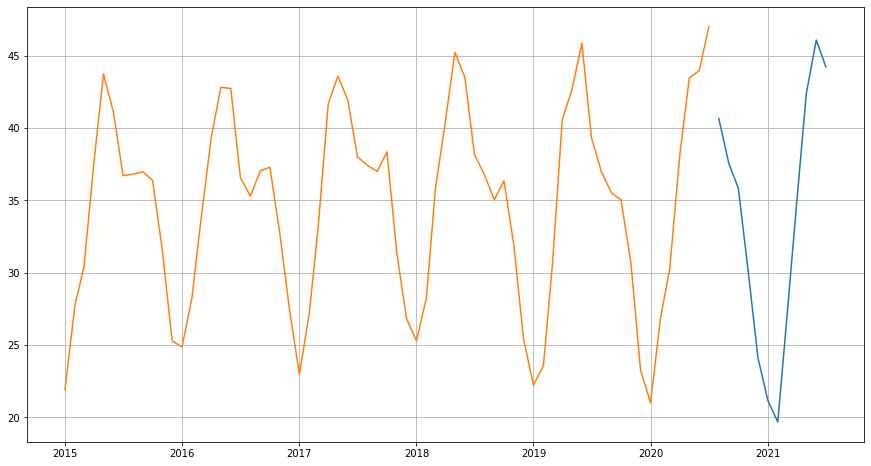

In [42]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.plot( true_preds['Forecast'])
plt.plot( India_temp['y'])